In [1]:
# Dependencies
import json
import requests
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import operator
from pprint import pprint

In [2]:
# Original Dataframe used for Revenue, Budget information
path = "tmdb-5000-movie-dataset/tmdb_5000_movies.csv"
df = pd.read_csv(path)
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
# New Dataframe used for Analysis
path = "moviesapi.csv"
new_df = pd.read_csv(path)
new_df.head()

,Title,Year,Rated,Runtime,Genre,Director,Writer,Language,Country,Awards,Metascore,IMDB Rating
0,Avatar,2009,PG-13,162 min,"Action, Adventure, Fantasy, Sci-Fi",James Cameron,James Cameron,"English, Spanish","UK, USA",Won 3 Oscars. Another 85 wins & 128 nominations.,83.0,7.8
1,Pirates of the Caribbean: At World's End,2007,PG-13,169 min,"Action, Adventure, Fantasy",Gore Verbinski,"Ted Elliott, Terry Rossio, Ted Elliott (charac...","Mandarin, English",USA,Nominated for 2 Oscars. Another 20 wins & 44 n...,50.0,7.1
2,Spectre,2015,PG-13,148 min,"Action, Adventure, Thriller",Sam Mendes,"John Logan (screenplay by), Neal Purvis (scree...","English, Spanish, Italian, German, French","UK, USA",Won 1 Oscar. Another 7 wins & 32 nominations.,60.0,6.8
3,The Dark Knight Rises,2012,PG-13,164 min,"Action, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","English, Arabic","UK, USA",Nominated for 1 BAFTA Film Award. Another 38 w...,78.0,8.4
4,John Carter,2012,PG-13,132 min,"Action, Adventure, Sci-Fi",Andrew Stanton,"Andrew Stanton (screenplay by), Mark Andrews (...",English,USA,2 wins & 8 nominations.,51.0,6.6


In [4]:
# Movie release dates are between 1916 and 2017
df['release_date'].sort_values(ascending= False).head(5)

4255    2017-02-03
3408    2016-10-02
3302    2016-09-16
4720    2016-09-09
3249    2016-09-09
Name: release_date, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [6]:
df = df.drop(columns= 'tagline')
df = df.drop(columns= 'homepage')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 18 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
dtypes: float64(3), int64(4), object(11)
memory usage: 675.5+ KB


In [7]:
# Highest revenue generating movies 
revenue_df = pd.DataFrame({'Title' : df['title'],
                           'Revenue': df['revenue'],
                           'Budget' : df['budget']})
revenue_df.sort_values(by= 'Revenue', ascending=False).head()

,Title,Revenue,Budget
0,Avatar,2787965087,237000000
25,Titanic,1845034188,200000000
16,The Avengers,1519557910,220000000
28,Jurassic World,1513528810,150000000
44,Furious 7,1506249360,190000000


In [8]:
merged_df=pd.merge(new_df, revenue_df, on='Title')
merged_df.head()

,Title,Year,Rated,Runtime,Genre,Director,Writer,Language,Country,Awards,Metascore,IMDB Rating,Revenue,Budget
0,Avatar,2009,PG-13,162 min,"Action, Adventure, Fantasy, Sci-Fi",James Cameron,James Cameron,"English, Spanish","UK, USA",Won 3 Oscars. Another 85 wins & 128 nominations.,83.0,7.8,2787965087,237000000
1,Pirates of the Caribbean: At World's End,2007,PG-13,169 min,"Action, Adventure, Fantasy",Gore Verbinski,"Ted Elliott, Terry Rossio, Ted Elliott (charac...","Mandarin, English",USA,Nominated for 2 Oscars. Another 20 wins & 44 n...,50.0,7.1,961000000,300000000
2,Spectre,2015,PG-13,148 min,"Action, Adventure, Thriller",Sam Mendes,"John Logan (screenplay by), Neal Purvis (scree...","English, Spanish, Italian, German, French","UK, USA",Won 1 Oscar. Another 7 wins & 32 nominations.,60.0,6.8,880674609,245000000
3,The Dark Knight Rises,2012,PG-13,164 min,"Action, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","English, Arabic","UK, USA",Nominated for 1 BAFTA Film Award. Another 38 w...,78.0,8.4,1084939099,250000000
4,John Carter,2012,PG-13,132 min,"Action, Adventure, Sci-Fi",Andrew Stanton,"Andrew Stanton (screenplay by), Mark Andrews (...",English,USA,2 wins & 8 nominations.,51.0,6.6,284139100,260000000


In [9]:
merged_df.groupby(['Genre']).head()

,Title,Year,Rated,Runtime,Genre,Director,Writer,Language,Country,Awards,Metascore,IMDB Rating,Revenue,Budget
0,Avatar,2009,PG-13,162 min,"Action, Adventure, Fantasy, Sci-Fi",James Cameron,James Cameron,"English, Spanish","UK, USA",Won 3 Oscars. Another 85 wins & 128 nominations.,83.0,7.8,2787965087,237000000
1,Pirates of the Caribbean: At World's End,2007,PG-13,169 min,"Action, Adventure, Fantasy",Gore Verbinski,"Ted Elliott, Terry Rossio, Ted Elliott (charac...","Mandarin, English",USA,Nominated for 2 Oscars. Another 20 wins & 44 n...,50.0,7.1,961000000,300000000
2,Spectre,2015,PG-13,148 min,"Action, Adventure, Thriller",Sam Mendes,"John Logan (screenplay by), Neal Purvis (scree...","English, Spanish, Italian, German, French","UK, USA",Won 1 Oscar. Another 7 wins & 32 nominations.,60.0,6.8,880674609,245000000
3,The Dark Knight Rises,2012,PG-13,164 min,"Action, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","English, Arabic","UK, USA",Nominated for 1 BAFTA Film Award. Another 38 w...,78.0,8.4,1084939099,250000000
4,John Carter,2012,PG-13,132 min,"Action, Adventure, Sci-Fi",Andrew Stanton,"Andrew Stanton (screenplay by), Mark Andrews (...",English,USA,2 wins & 8 nominations.,51.0,6.6,284139100,260000000
5,Spider-Man 3,2007,PG-13,139 min,"Action, Adventure, Sci-Fi",Sam Raimi,"Sam Raimi (screenplay), Ivan Raimi (screenplay...","English, French",USA,Nominated for 1 BAFTA Film Award. Another 3 wi...,59.0,6.2,890871626,258000000
6,Tangled,2010,PG,100 min,"Animation, Adventure, Comedy, Family, Fantasy,...","Nathan Greno, Byron Howard","Dan Fogelman (screenplay by), Jacob Grimm (bas...",English,USA,Nominated for 1 Oscar. Another 9 wins & 40 nom...,71.0,7.8,591794936,260000000
7,Avengers: Age of Ultron,2015,PG-13,141 min,"Action, Adventure, Sci-Fi",Joss Whedon,"Joss Whedon, Stan Lee (based on the Marvel com...","English, Korean",USA,7 wins & 45 nominations.,66.0,7.3,1405403694,280000000
8,Harry Potter and the Half-Blood Prince,2009,PG,153 min,"Adventure, Family, Fantasy, Mystery",David Yates,"Steve Kloves (screenplay), J.K. Rowling (novel)",English,"UK, USA",Nominated for 1 Oscar. Another 8 wins & 35 nom...,78.0,7.6,933959197,250000000
9,Batman v Superman: Dawn of Justice,2016,PG-13,151 min,"Action, Adventure, Fantasy, Sci-Fi",Zack Snyder,"Chris Terrio, David S. Goyer, Bob Kane (Batman...",English,USA,14 wins & 30 nominations.,44.0,6.5,873260194,250000000


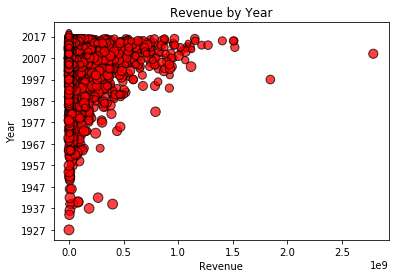

In [10]:
# Bubble plot to show revenue by year, with bubble size corresponding to score
list_scores=[]
list_years=[]
merged_df = merged_df.dropna(subset=['Metascore'])
merged_df['Metascore'] = merged_df['Metascore'].astype(float)
merged_df = merged_df.dropna(subset=['Revenue'])
merged_df['Revenue'] = merged_df['Revenue'].astype(float)
for list_item in merged_df['Metascore']:
    list_scores.append(int(list_item))
        
for list_item in merged_df['Year']:
    list_years.append(int(list_item))    
    
x_axis= merged_df['Revenue']
y_axis= list_years
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=list_scores,alpha=0.75)
plt.yticks(np.arange(min(y_axis), max(y_axis)+1, 10))
plt.title("Revenue by Year")
plt.xlabel("Revenue")
plt.ylabel("Year")
plt.show()

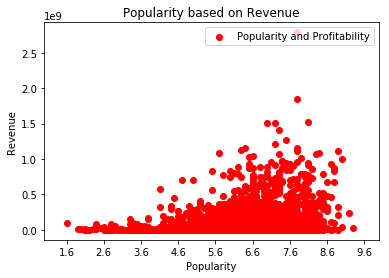

In [17]:
#Scatter plot based on popularity vs profitability
x_axis=merged_df['IMDB Rating']
y_axis=merged_df['Revenue']
list_imdb=[]
list_revenue=[]
for list_item in merged_df['IMDB Rating']:
    list_imdb.append(float(list_item))
        
for list_item in merged_df['Revenue']:
    list_years.append(int(list_item))
    
plt.scatter(x_axis, y_axis, color="red", label="Popularity and Profitability")
plt.legend(loc="upper right")
plt.title("Popularity based on Revenue")
plt.xlabel("Popularity")
plt.ylabel("Revenue")
plt.xticks(np.arange(min(list_imdb), max(list_imdb)+1, 1.0))
plt.xlim(1.0,10.0)
plt.show()

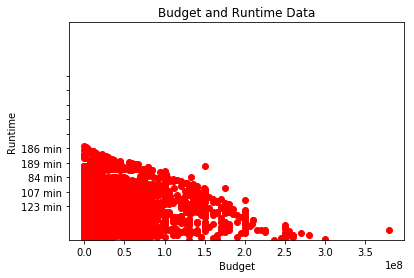

In [24]:
#Budget vs Runtime Scatter Plot
x_axis=merged_df['Budget']
y_axis=merged_df['Runtime']
list_runtime=[]

for list_item in merged_df['Runtime']:
    list_item=list_item.strip(' min')
    list_runtime.append(int(list_item))
    
plt.scatter(x_axis, y_axis, color="red", label="Budget vs Runtime")
plt.title("Budget and Runtime Data")
plt.xlabel("Budget")
plt.ylabel("Runtime")
plt.yticks(np.arange(min(list_runtime), max(list_runtime)+1, 20))
plt.ylim(0,300)
plt.show()